<a href="https://colab.research.google.com/github/Basil-Shitemi/Dog-Vision-Project_Basil/blob/main/dog_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Dog Breed classification
This notebook builds an end-to-end multi-class dogs image classifier using Tensorflow 2.0 and Tensorflow Hub

## 1. Problem
Identifying the breed of a dog using the image of a dog

## 2. Data
The data we are using is from kaggle's competition on Dog Breed identification. https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation
The evalution of Prediction probabilities of for each dog breed of each image

## 4. Features
We are dealing with images (unstructured data) so we are using deep learning and Transfer learning.
We have 120 dog breeds( Hence 120 different classes)
There are around 10000+ images in the traning set and and these images have labels.
There are around 10000+ images in the test set without labels since we want to predict them

In [ ]:
#!unzip '/content/drive/MyDrive/dog_vision/dog-breed-identification.zip' -d '/content/drive/MyDrive/dog_vision/'

## Get our Work space ready
* import Tensorflow 2.0✅
* import Tensorflow Hb✅
* Make sure we are using a GPU✅

In [ ]:
#Import necessary tool
import tensorflow as tf
import tensorflow_hub as hub
print('Tf Version:',tf.__version__)
print('Tf Hub version',hub.__version__)

#check GPU availability
print('GPU','available' if tf.config.list_physical_devices('GPU') else 'not available')

Tf Version: 2.18.0
Tf Hub version 0.16.1
GPU available


## Getting our data ready(Turning them into Tensors)
with all our Ml models, our data has to be in numerical format. So first, we have to turn our images into Tensors(numerical)
Let's access our data and check out our labels

In [ ]:
#check out the labels of our data
import pandas as pd
label_csv = pd.read_csv('/content/drive/MyDrive/dog_vision/labels.csv')
print(label_csv.describe())
print(label_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

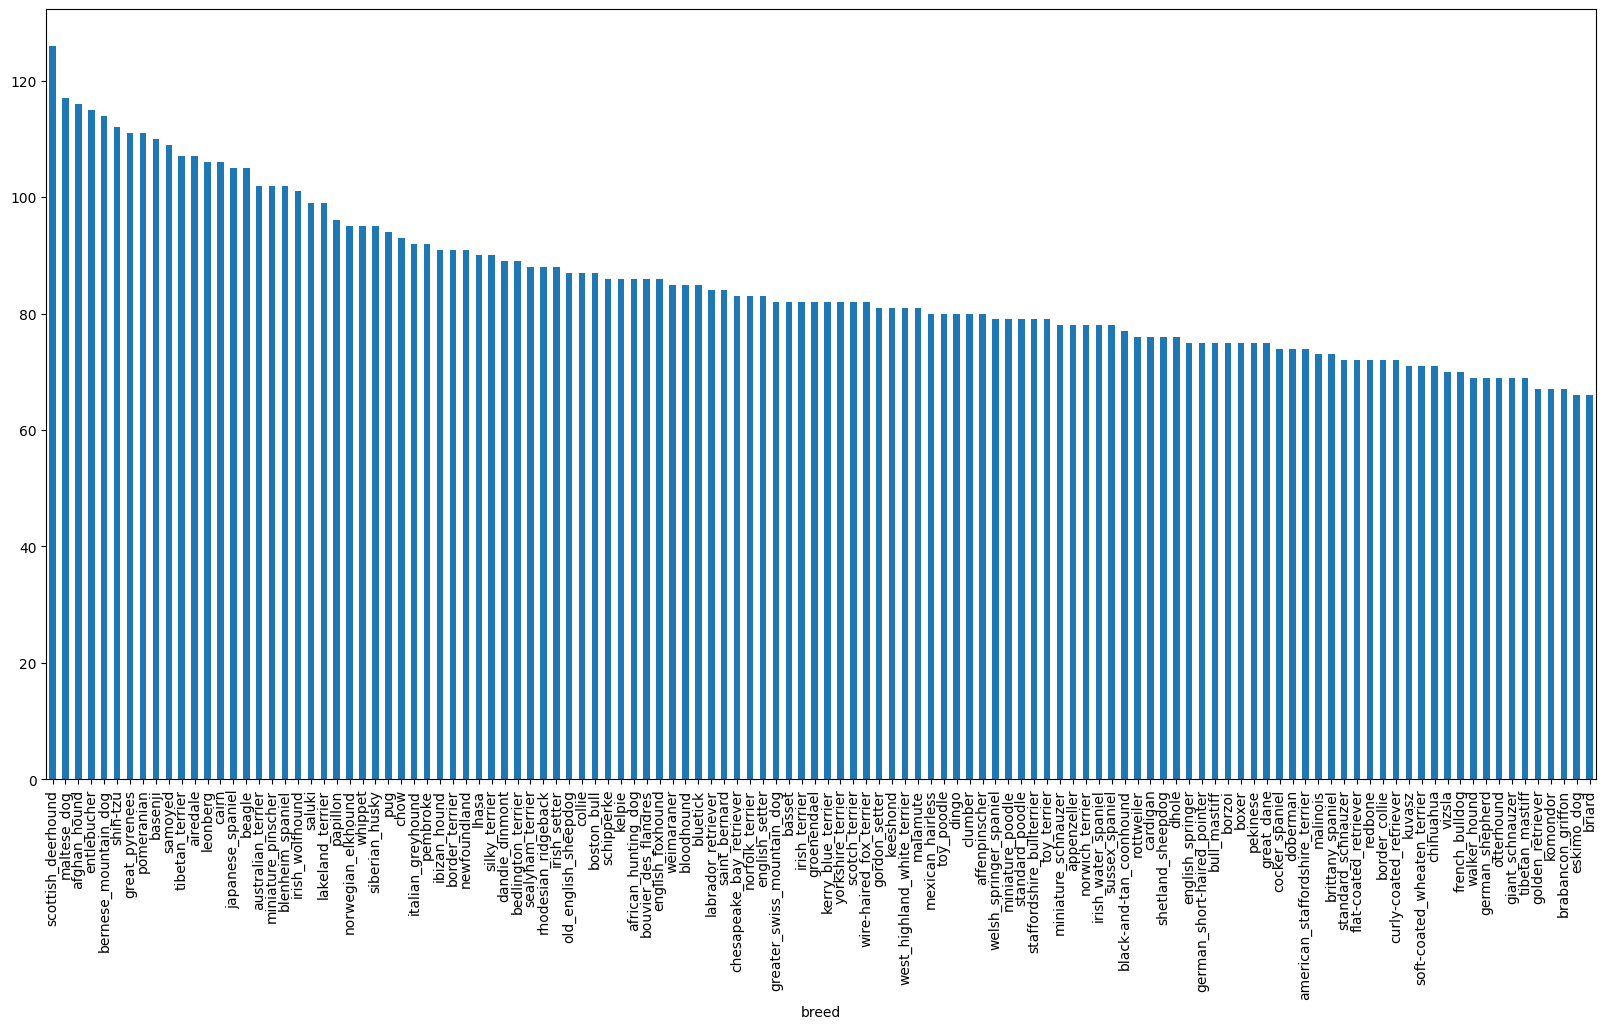

In [ ]:
# How many images are there of each breed
label_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
label_csv['breed'].value_counts().median()

82.0

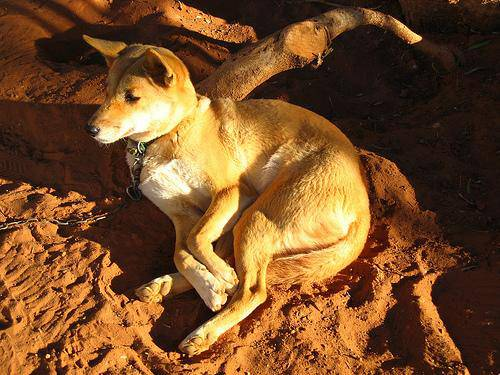

In [ ]:
#Let's view our image
from IPython.display import Image
Image('drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg')

#### Getting images and their labels.
let's get a list of all of our images file pathnames

In [ ]:
label_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
# create pathnames from image IDs
filenames = ['drive/MyDrive/dog_vision/train/'+ fname + '.jpg' for fname in label_csv['id']]
# check the first 10
filenames[:10]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
# check whether the number of filenames matches the numbers of actual images file
import os
if len(os.listdir('drive/MyDrive/dog_vision/train/')) == len(filenames):
  print('Filenames match actual numbers of files')
else:
  Print('Filenames do not match the actual number of files, check the target directory')

Filenames match actual numbers of files


In [ ]:
os.listdir('drive/MyDrive/dog_vision/train/')[:10]

['e614058019fbb49489ee4f9090cf25ef.jpg',
 'ddf85ff807c96d56f25b420fcaa121fe.jpg',
 'e29768ede01098a68e5021b453a94ee8.jpg',
 'def67b643b92ee3d6cdec1128df0a9b6.jpg',
 'de37d314715709b183d88ec82184330a.jpg',
 'e86a88391d017cc3807cc9653a4a7290.jpg',
 'e5d36dcf26d2f478531b1702508b13aa.jpg',
 'e7ab74acdc860dfb93271901da085ffd.jpg',
 'ddc8d051c9b476c1eef9d35566490e59.jpg',
 'e8baa7663b726cad8eefb319ca7d8195.jpg']

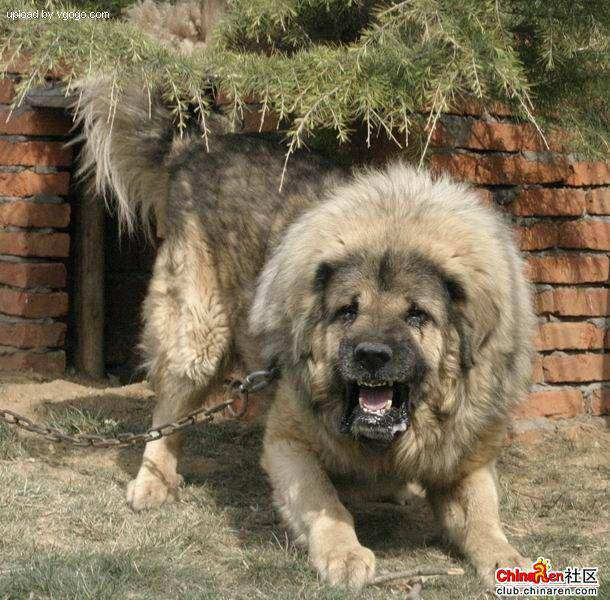

In [ ]:
# one more check
Image(filenames[9000])

In [ ]:
label_csv['breed'][9000]

'tibetan_mastiff'

We have got our training filepath in a list, let us prepare our labels

In [ ]:
import numpy as np
labels = label_csv['breed']
labels = np.array(labels)# .to numpy (does the same thing)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# check if the number of labels matches the number of filenames
if len(labels) == len(filenames):
  print('Number of labels matches number of filenames')
else:
  print('Number of labels does not match number of filenames, check data directories')

Number of labels matches number of filenames


In [ ]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] ==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [ ]:
# Turn every label into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Example; Turning Boolean arrays into intergers
print(labels[0])
print(np.where(unique_breeds == labels[0])[0][0]) # index where labels occurs
print(boolean_labels[0].argmax()) #index where labels occurs in boolean arrays
print(boolean_labels[0].astype(int)) # There should be one where sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[10000])
print(boolean_labels[10000].astype(int))

pembroke
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
filenames[:10]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

### Creating our own Validation set
Since our dataset from Kaggle does not come with validation set, we have to create our own

In [ ]:
# Creating X and Y variables
x = filenames
y = boolean_labels

We are going to experimenting ~1000 images and increase as needed

In [ ]:
# set number to use for experimenting
NUM_IMAGES = 1000 #@param{type:'slider',min:1000,max:10000,step:1000}

In [ ]:
# Let us split our data into training and validation splits
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
x_train,x_val,y_train,y_val = train_test_split(x[:NUM_IMAGES],
                                               y[:NUM_IMAGES],
                                               test_size=0.2,
                                               random_state=42)
len(x_train),len(y_train),len(x_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
#Let us have a look at the training data
x_train[:2], y_train[:2]

(['drive/MyDrive/dog_vision/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/dog_vision/train/0d2f9e12a2611d911d91a339074c8154.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, Fal

## Preprocessing Images(Turning images into Tensors)
To preprocess images into Tensors we are going to write a function which does a few things.
1. Take an image path as input
2. Use Tensorflow to read the file and save it to a variable named `image`
3. Turn image (a jpg) into  Tensors
4. Resize our images into a standardized shape of (224,224)
5. Return a modified image


Before we do, let us see how importing images looks like

In [ ]:
# Convert images into Numpy arrays
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [ ]:
image.max(), image.min()

(np.uint8(255), np.uint8(0))

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]],

       [[ 56, 104,  66],
        [ 58, 106,  68],
        [ 64, 112,  74],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 74, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  11],
        [  8,  14,  14],
        ...,
        [120, 113,  67],
        [126, 118,  71],
        [122, 114,  67]],

       [[  0,   3,   7],
        [  2,   7,  10],
        [  3,   9,   7],
        ...,
        [105,  98,  54],
        [112, 104,  58],
        [111, 103,  57]],

       [[ 16,  18,  30],
        [ 16,  19,  24],
        [ 15,  20,  14],
        ...,
        [101,  92,  51],
        [ 97,  88,  47],
        [120, 111,  70]]], dtype=uint8)
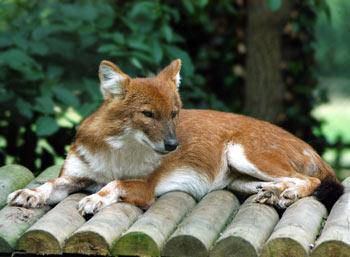

In [ ]:
image

In [ ]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [ ]:
tf.constant(image)[:2]  ## This is in Tensors hence can run well in GPU

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

## Preprocessing Images(Turning images into Tensors)
To preprocess images into Tensors we are going to write a function which does a few things.
1. Take an image path as input
2. Use Tensorflow to read the file and save it to a variable named `image`
3. Turn image (a jpg) into  Tensors
4. Normalize our (convert color channels from 0-255 t0 0-1)
5. Resize our images into a standardized shape of (224,224)
6. Return a modified image


Before we do, let us see how importing images looks like

In [ ]:
# Have seen an image as a tensor now let me proceed
# Define image size
IMG_SIZE = 224

#create function for preprocessing images
def process_images(image_path, img_size=IMG_SIZE):
  '''
  Takes an images filepath and turns it into a Tensor
  '''
  #Read in an image file
  image = tf.io.read_file(image_path)
  #Turn jpg image into numerical Tensor with 3 color channels(RGB)
  image = tf.image.decode_jpeg(image,channels=3)
  # convert the color channel values from 0-255 to 0-1 values
  image = tf.image.convert_image_dtype(image,tf.float32)
  # Resize our image to our desired size(224,224)
  image = tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE])
  return image

In [ ]:
# illustrates how this function works
#tensor = tf.io.read_file(filenames[26])
#tensor

In [ ]:
# tensor = tf.io.read_file(filenames[26])
# tensor=tf.image.decode_jpeg(tensor,channels=3)
# tf.image.convert_image_dtype(tensor,tf.float32)

## Turning our data into batches
Best batch to use is 32 images at a time. Can manually  adjust it when needed.
 why turn our data into batches?
- let's say you want to process 10k+ images in one go..they all might not fit in memory.GPU is fast but has less memory(RAM)
- In order to Use Tensorflow effectively,we need our data need our data in the form of Tensor tuples which looks like this;
`(image,label)`

In [ ]:
# create a simple function that simple function to return a tuple(image,label)
def get_image_label(image_path,label):
  '''
  Takes an image filepath and associated label,processes the image and  returns a tuple of image,label
  '''
  image = process_images(image_path)
  return image,label

In [ ]:
# Demo of the above, ensure the label is in tensors too
(process_images(x[42]),tf.constant(y[42]))

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we have got a waay of turning our data into tuples of Tensors  in the form of; (image,label), Let us make a function that turns all of our data into batches

In [ ]:
#Define the batch size, 32 is a good start
BATCH_SIZE = 32
# create a function to turn data into batches
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data= False):
  '''
  Creates batches of data out of image(x) and label(y) pairs
  shuffles our data if it is training data but doesn't shuffle if it is validation data.
  Also accepts test data as input(no labels)
  '''
  # Test data, we don't have labels
  if test_data:
    print('Creating testing data batches..')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # Only filepaths no labels
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch
  # If the data is valid dataset, we do not need to shuffle
  elif valid_data:
    print('Creating validation data batches...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # filepaths and labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  else:
    print('Creating training data batches..')
    # Turn filepaths and labels into tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y))) # filepaths and labels
    # shuffling pathnames and labels before mapping image processor is faster than shuffling images
    data =data.shuffle(buffer_size=len(x))
    # create (image,label) tuples( this also turns image path into a preprocessed image)
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    #Turn the training data into batches
    #data_batch = data.batch(BATCH_SIZE)
  return data_batch


In [ ]:
# Create a training and validation data batch
train_data = create_data_batches(x_train,y_train)
val_data = create_data_batches(x_val,y_val,valid_data=True)

Creating training data batches..
Creating validation data batches...


In [ ]:
# check out different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing data in batches
Our data is now in batches,however, this can be a bit difficult to comprehend. let us visualize them

In [ ]:
import matplotlib.pyplot as plt
#create a function for viewing images in a data_batch
def show_25_images(images,labels):
  '''
  Displays a lot of 25 images and their labels from data_batch
  '''
  #set up the figure
  plt.figure(figsize=(10,10))
  # loop through 25(for displaying 25 images)
  for i in range(25):
    #create subplots(5 rows,5 columns)
    ax = plt.subplot(5,5, i+1)
    # Display the image
    plt.imshow(images[i])
    # Add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])
    #Turn the grid lines off
    plt.axis('off')



In [ ]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 120), dtype=tf.bool, name=None))>

In [ ]:
train_images,train_labels = next(train_data.as_numpy_iterator())
len(train_images),len(train_labels)

(32, 32)

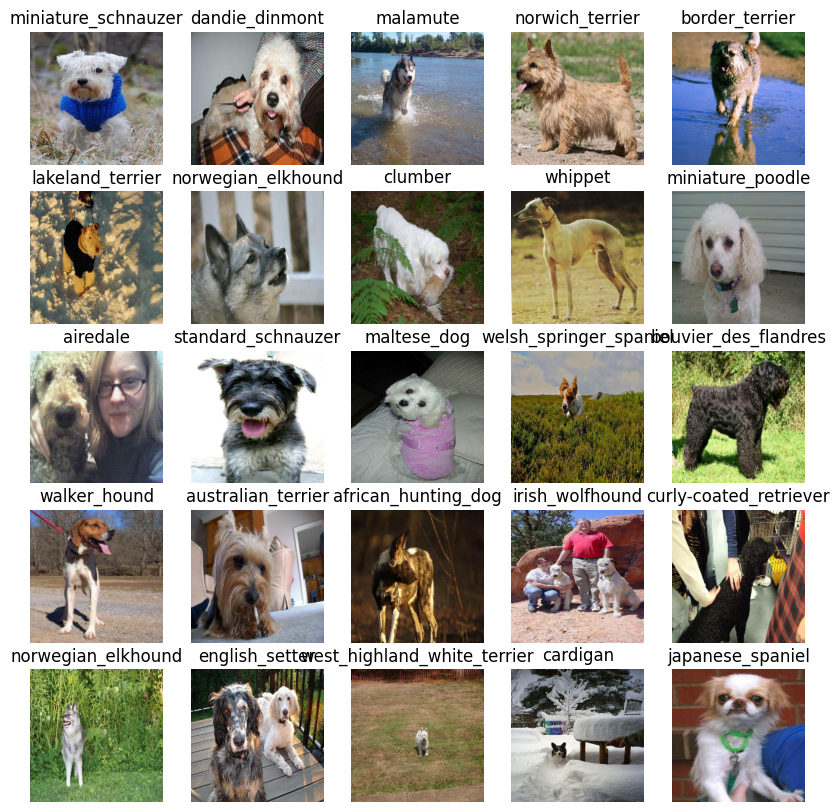

In [ ]:
# Now let's visualize the data in our training batch
train_images,train_labels = next(train_data.as_numpy_iterator()) # keeps changing the batch to next 25, it shuffles the data
show_25_images(train_images,train_labels)

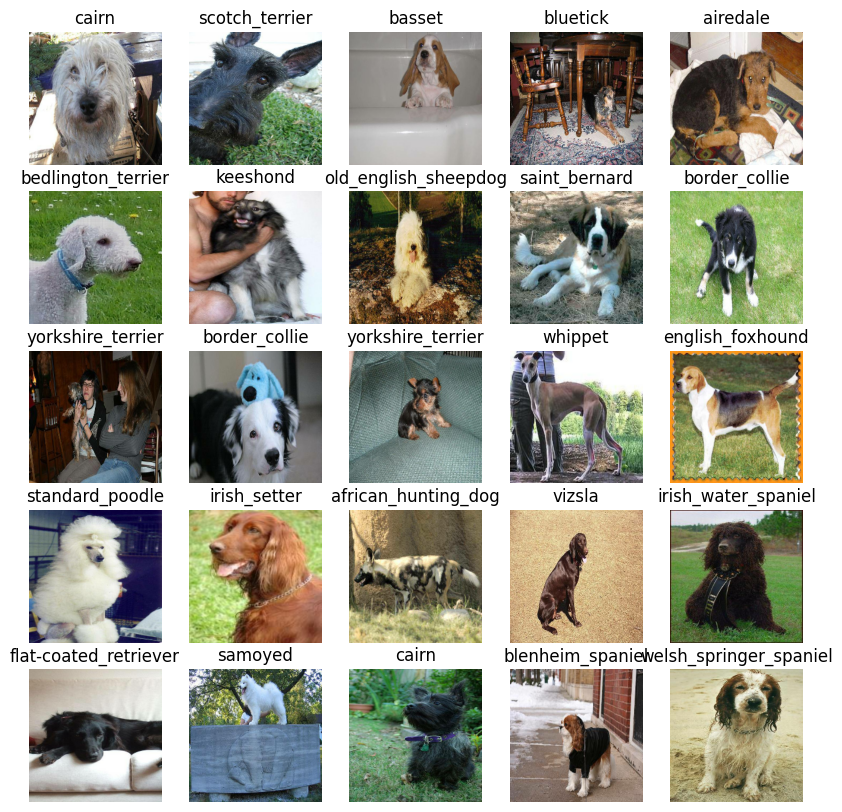

In [ ]:
# Now let's visualize our validation data
val_images,val_labels = next(val_data.as_numpy_iterator()) # Does not change because we do not shuffle our data
show_25_images(val_images,val_labels)

# Building a model
Before we build a model,there are a few things we need to define:
* The input shape (our images shape,in the form of Tensors)
* The output shape (images labels, in the form of Tensors) of our model
* The URL of the model we want to use from TensorFlow Hub

In [ ]:
# Setup input shape to the model
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, colour channels

# Setup output shape of the model
OUTPUT_SHAPE = len(unique_breeds) # number of unique labels

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

Now we have got our input and output models ready to go, Let's put it into keras deep learning model.
knowing this, let's create a function which:
* Takes the input shape,output shape and the model we have chosen as parameters
* Defines the layers in keras model in a sequential fashion(do this first,then then this, then that)
* compiles the model (says how it should be evaluated and improved)
* Builds the model(tells the input shape it'll be getting)
* Returns the model
All this steps are in the documentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Create a function which builds a Keras model
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
      hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
      tf.keras.layers.Dense(units=OUTPUT_SHAPE,activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(), # Our model wants to reduce this (how wrong its guesses are)
      optimizer=tf.keras.optimizers.Adam(), # A friend telling our model how to improve its guesses
      metrics=["accuracy"] # We'd like this to go up
  )

  # Build the model
  model.build(INPUT_SHAPE) # Let the model know what kind of inputs it'll be getting

  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4


ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7d57cc6f12d0> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)